<a href="https://colab.research.google.com/github/TevinCampbell91/repo/blob/main/Soccer_prediction_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, clear_output
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display, clear_output

# ⚽ SOCCER MATCH OVER/UNDER PREDICTOR ⚽
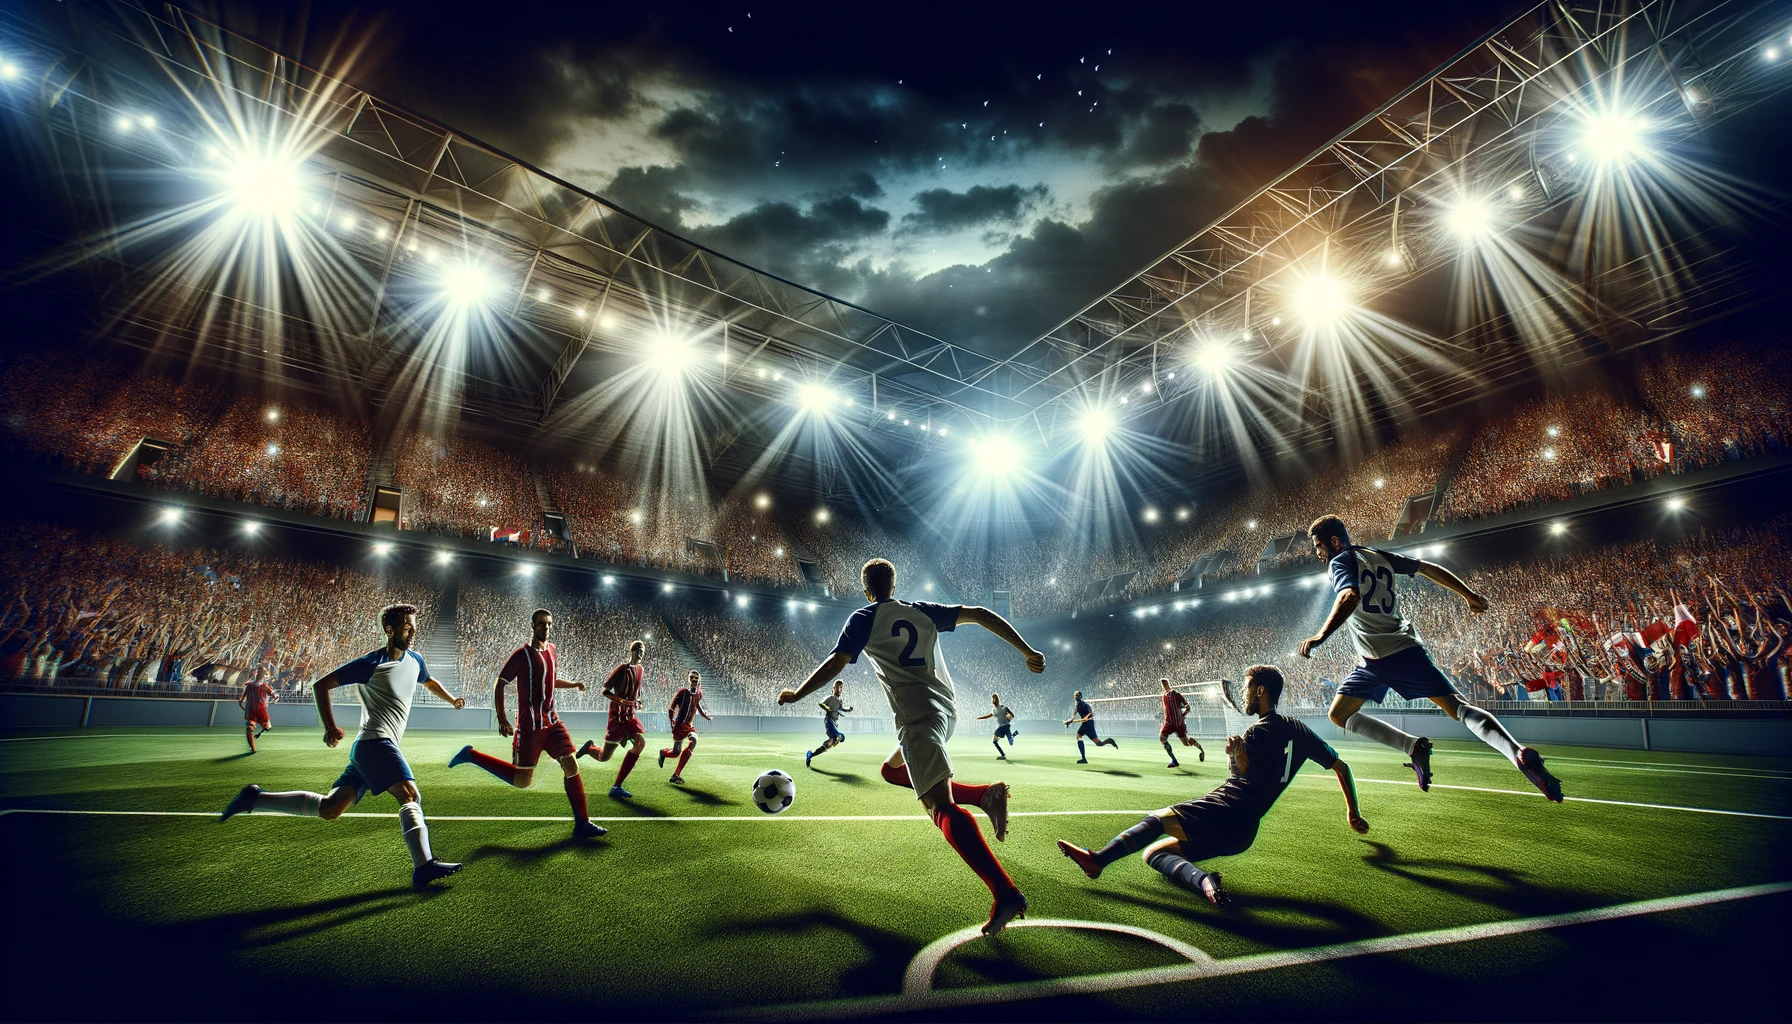

#DATA COLLECTION AND PROCESSING

The dataset used for our model was available for public use at kaggle.com. Before the data could be used by our model it had to be collected and then formatted. Below is our data before any processing:


In [2]:
results_og = pd.read_csv("results1.csv")
results_og

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47320,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True
47321,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True
47322,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True
47323,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True


In order to clean our data and format it we did the following to process the data


1.   Remove the 'date' column
2.   Remove all rows with N/A values from the table(this only included upcoming scheduled matches)
3. Create a third column, 'total_score' that sums the 'home_score' and 'away_score' from the column.
4. Convert the categorical variables into numerical variables(1/0) via one hot encoding. The fields converted were 'home_team', 'away_team',
 'tournament', 'city', and 'country'.

 Below is a representation of the data after cleaning and formatting:







In [3]:
results_og.dropna(inplace=True)
results_og['total_score'] = results_og['home_score'] + results_og['away_score']
results_og.drop(columns='date', inplace=True)
results_conv = pd.get_dummies(results_og,columns=['home_team','away_team','tournament','city','country'])
results_conv


,home_score,away_score,neutral,total_score,home_team_Abkhazia,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,home_team_American Samoa,...,country_Western Samoa,country_Yemen,country_Yemen AR,country_Yemen DPR,country_Yugoslavia,country_Zambia,country_Zanzibar,country_Zaïre,country_Zimbabwe,country_Éire
0,0.0,0.0,False,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.0,2.0,False,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1.0,False,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,2.0,False,4.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,0.0,False,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47262,1.0,0.0,False,1.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47263,2.0,2.0,True,4.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47264,3.0,1.0,True,4.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47265,4.0,0.0,False,4.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#MACHINE LEARNING MODEL
The learning model we decided to use for our prediction tool was a supervised linear regression. The goal of our model is to predict the score of a soccer match and then simply provide a prediction of whether the match would go over or under. To do this we took a few steps:

1.  Designated X(team, city, country, tournament, neutrality) and Y(total score) variables for project.
2.   Created a model object using sci-kit library
3.   Split data into training and testing data sets
4.  Trained the model using training and testing data set



In [4]:
X = results_conv.drop(columns=['home_score', 'away_score', 'total_score'])
y = results_conv['total_score']
soccer_algo = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
soccer_algo.fit(X_train, y_train)

LinearRegression()

#ACCURACY METRICS
Our model was not assessed on whether it could predict the total goal count for a match, but on whether or not it would succesfully predict whether the total goal count would go over 2.5 or not. Therefore before we tested our prediction we needed to take this into account by making the following adjustments:


1.   Producing an object to hold results of soccer total goal predictions using test data.
2.   Converting that object to represent whether a game is predicted to go over or under using binary representation
3.We then used our actual test results and convert that to represent a binary prediction of whether a game went over or under
4.Compared the predictive over/under with the actual over/under using accuracy score as well as the f1 score


In [5]:
y_predictions = soccer_algo.predict(X_test)
y_predictions_over_under = (y_predictions > 2.5).astype(int)
y_actual_over_under = (y_test > 2.5).astype(int)
algo_accuracy = accuracy_score(y_predictions_over_under, y_actual_over_under)
algo_f1 = f1_score(y_predictions_over_under, y_actual_over_under)

In [6]:
#Using these methods we obtained an accuracy score of:
print(algo_accuracy)

0.5642056272477258


In [7]:
#...and a f1 score of:
print(algo_f1)

0.6396711562008045


#VISUALIZATIONS

##The following visualization illustrates the total goals scored in games using a bar graph.

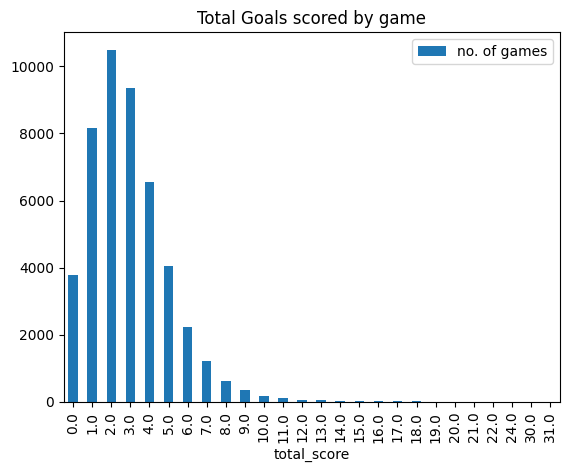

In [8]:
total_count = results_conv.groupby('total_score').size().reset_index(name="no. of games")
total_count.plot(x="total_score", y="no. of games", kind="bar",title="Total Goals scored by game");

##This illustration presents total goals by game using a histogram


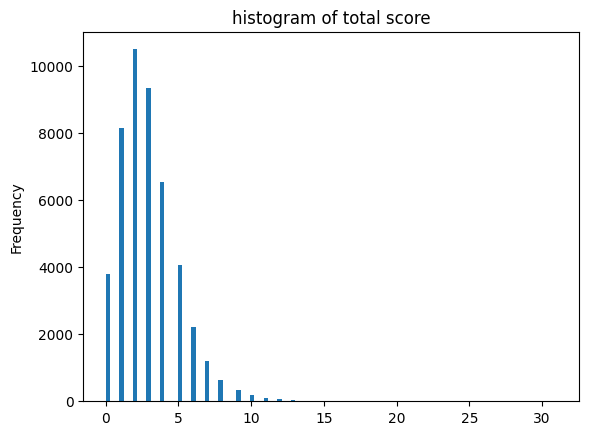

In [9]:
results_conv["total_score"].plot.hist(bins=100,title="histogram of total score");

##Lastly, here is a pie chart representing the percentage of games that went over 2.5 goals, those that did not. True represent over, and False represents under.

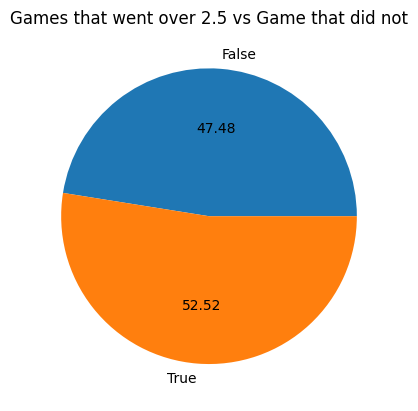

In [10]:
results_conv['over?'] = results_conv['total_score'] > 2.5
over_count = results_conv.groupby('over?').size()
over_count.plot.pie(autopct="%.2f", title="Games that went over 2.5 vs Game that did not");

# 💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰💰

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#USER INTERFACE
The accompanying user interface can be used to input xx variables to determine whether a match will go over or under.

In [12]:
home_team_dropdown = widgets.Dropdown(
    options=results_og['home_team'].unique(),
    description='Home Team:',
)

away_team_dropdown = widgets.Dropdown(
    options=results_og['away_team'].unique(),
    description='Away Team:',
)

tournament_dropdown = widgets.Dropdown(
    options=results_og['tournament'].unique(),
    description='Tournament:',
)

city_dropdown = widgets.Dropdown(
    options=results_og['city'].unique(),
    description='City:',
)

country_dropdown = widgets.Dropdown(
    options=results_og['country'].unique(),
    description='Country:',
)

neutral_toggle = widgets.ToggleButton(
    value=False,
    description='Neutral Game?',
    disabled=False,
    button_style='',
    tooltip='Grey for true, white for false'
)

predict_button = widgets.Button(description='Predict')

output = widgets.Output()

def get_prediction(home_team, away_team, tournament, city, country, neutral):
    with output:
        clear_output()

        user_choices_df = pd.DataFrame(0, index=[0], columns=X.columns)

        user_choices_df['neutral'] = 1 if neutral else 0
        user_choices_df['home_team_' + home_team] = 1
        user_choices_df['away_team_' + away_team] = 1
        user_choices_df['tournament_' + tournament] = 1
        user_choices_df['city_' + city] = 1
        user_choices_df['country_' + country] = 1


        prediction = soccer_algo.predict(user_choices_df)[0]
        over_under_prediction = "Over" if prediction > 2.5 else "Under"
        print(f"Predicted Total Score: {prediction:.2f}")
        print(f"Prediction: {over_under_prediction}")

def clicked_predict(b):
    get_prediction(
        home_team_dropdown.value,
        away_team_dropdown.value,
        tournament_dropdown.value,
        city_dropdown.value,
        country_dropdown.value,
        neutral_toggle.value
    )

predict_button.on_click(clicked_predict)

display(home_team_dropdown, away_team_dropdown, tournament_dropdown, city_dropdown, country_dropdown, neutral_toggle, predict_button, output)




Dropdown(description='Home Team:', options=('Scotland', 'England', 'Wales', 'Northern Ireland', 'United States…

Dropdown(description='Away Team:', options=('England', 'Scotland', 'Wales', 'Northern Ireland', 'Canada', 'Arg…

Dropdown(description='Tournament:', options=('Friendly', 'British Home Championship', 'Évence Coppée Trophy', …

Dropdown(description='City:', options=('Glasgow', 'London', 'Wrexham', 'Blackburn', 'Belfast', 'Liverpool', 'S…

Dropdown(description='Country:', options=('Scotland', 'England', 'Wales', 'Ireland', 'United States', 'Uruguay…

ToggleButton(value=False, description='Neutral Game?', tooltip='Grey for true, white for false')

Button(description='Predict', style=ButtonStyle())

Output()